In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Leon\AppData\Local\Temp\ipykernel_12636\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [2]:
df = pd.read_csv('kc-house-data.csv', encoding = 'latin-1')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### 1.2 Изучите стоимости недвижимости

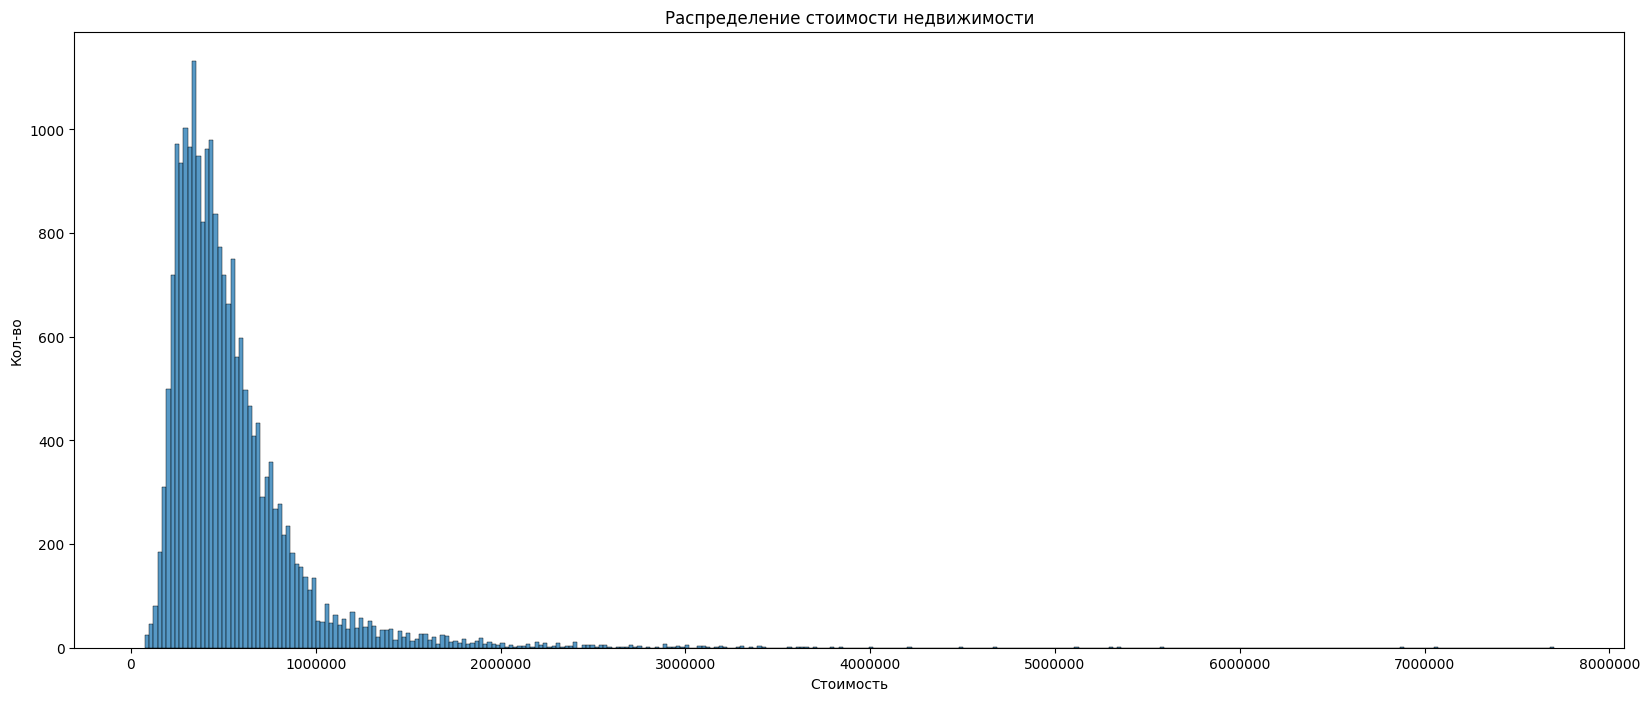

In [3]:
plt.figure(figsize=(20, 8))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

Вывод:

1. Колличество домов прямопропорционально их цене
2. Максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 2 000 000 д.е.

### 1.3 Изучите распределение квадратуры жилой

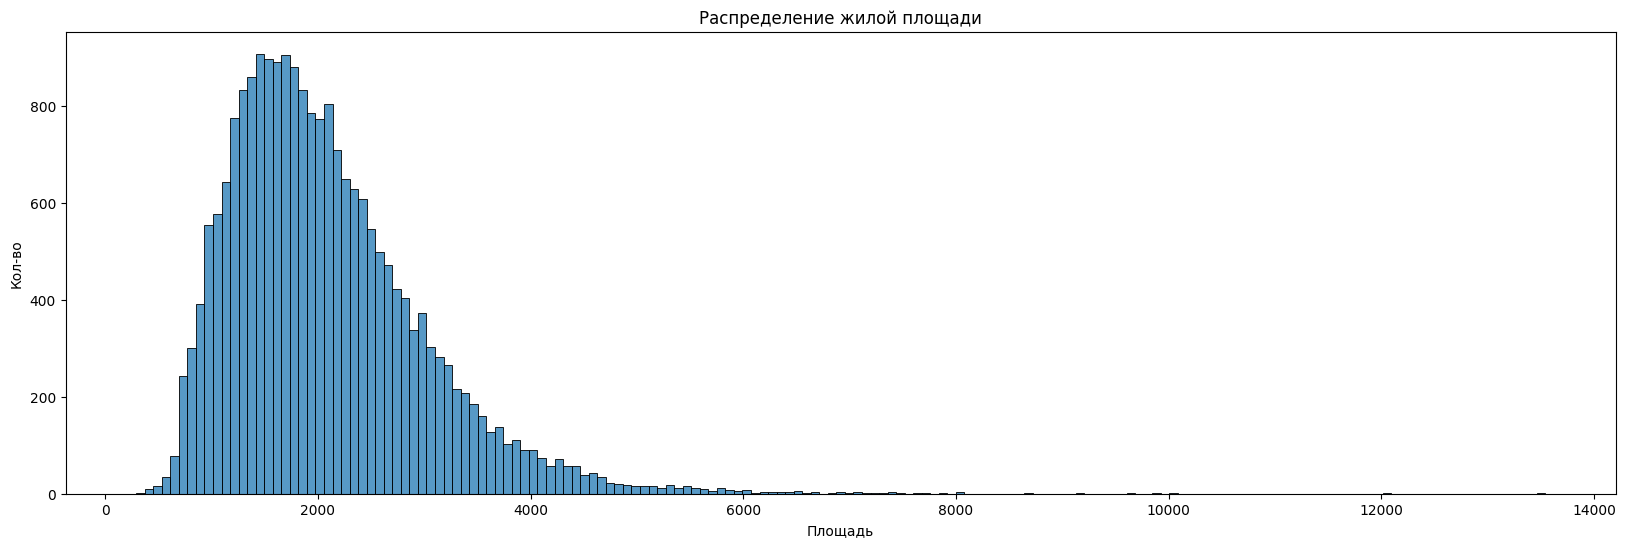

In [4]:
plt.figure(figsize=(20, 6))
sns.histplot(df['sqft_living'])
plt.ticklabel_format(style='plain')
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Кол-во');



Вывод:

Максимальное количество недвижимости продается с жилой площадью от ~1700 до 2300 кв.м., основная часть недвижимости продается с жилой площадью от ~500 до 6000 кв.м.



### 1.4 Изучите распределение года постройки

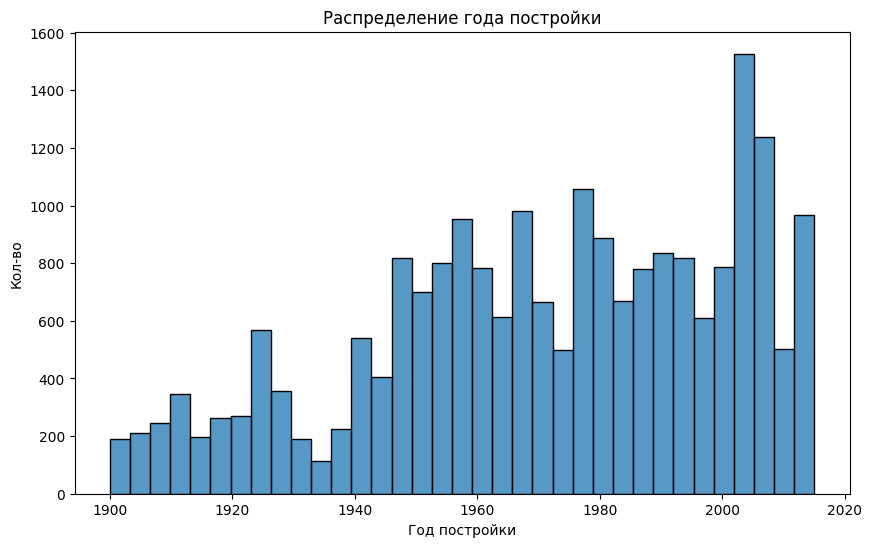

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

Вывод:

Кризисы строительтва были в середине 30-хб начале 70-х, пики в конце 60-хб 70-х и середине нулевых

## 2 Задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график

In [6]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

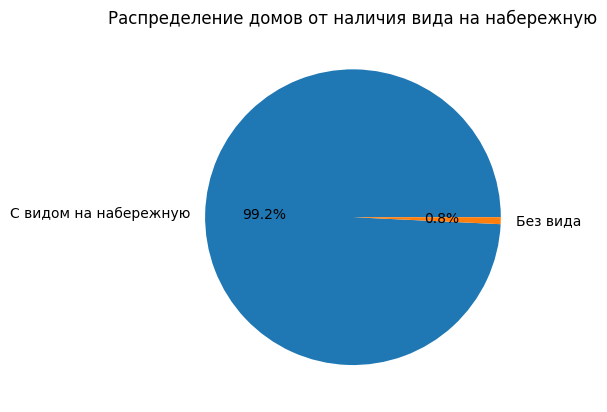

In [7]:
labels = ['С видом на набережную', 'Без вида']
plt.pie(data, autopct='%1.1f%%', labels=labels)
plt.title('Распределение домов от наличия вида на набережную');

Вывод:

Всего лишь 0,8% всей недвижимости продается с видом на набережную

### 2.2 Изучите распределение этажей домов

In [8]:
data = df['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

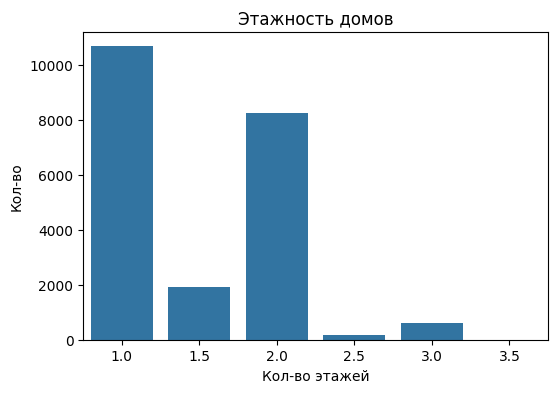

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data.index, y = data)
plt.title('Этажность домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во')
plt.xticks();

Вывод:

1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости в 49,4%.
3. Минимальная доля продажи приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%)

### 2.3 Изучите распределение состояния домов

In [10]:
data = df['condition'].value_counts()
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

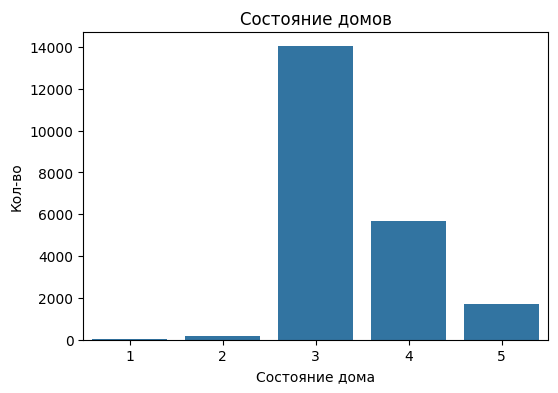

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data.index, y = data)
plt.title('Состояние домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во');

Вывод:

Менее 1% домов в плохом состоянии, около 2/3 домов в среднем (3) состоянии

## 3 задача
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

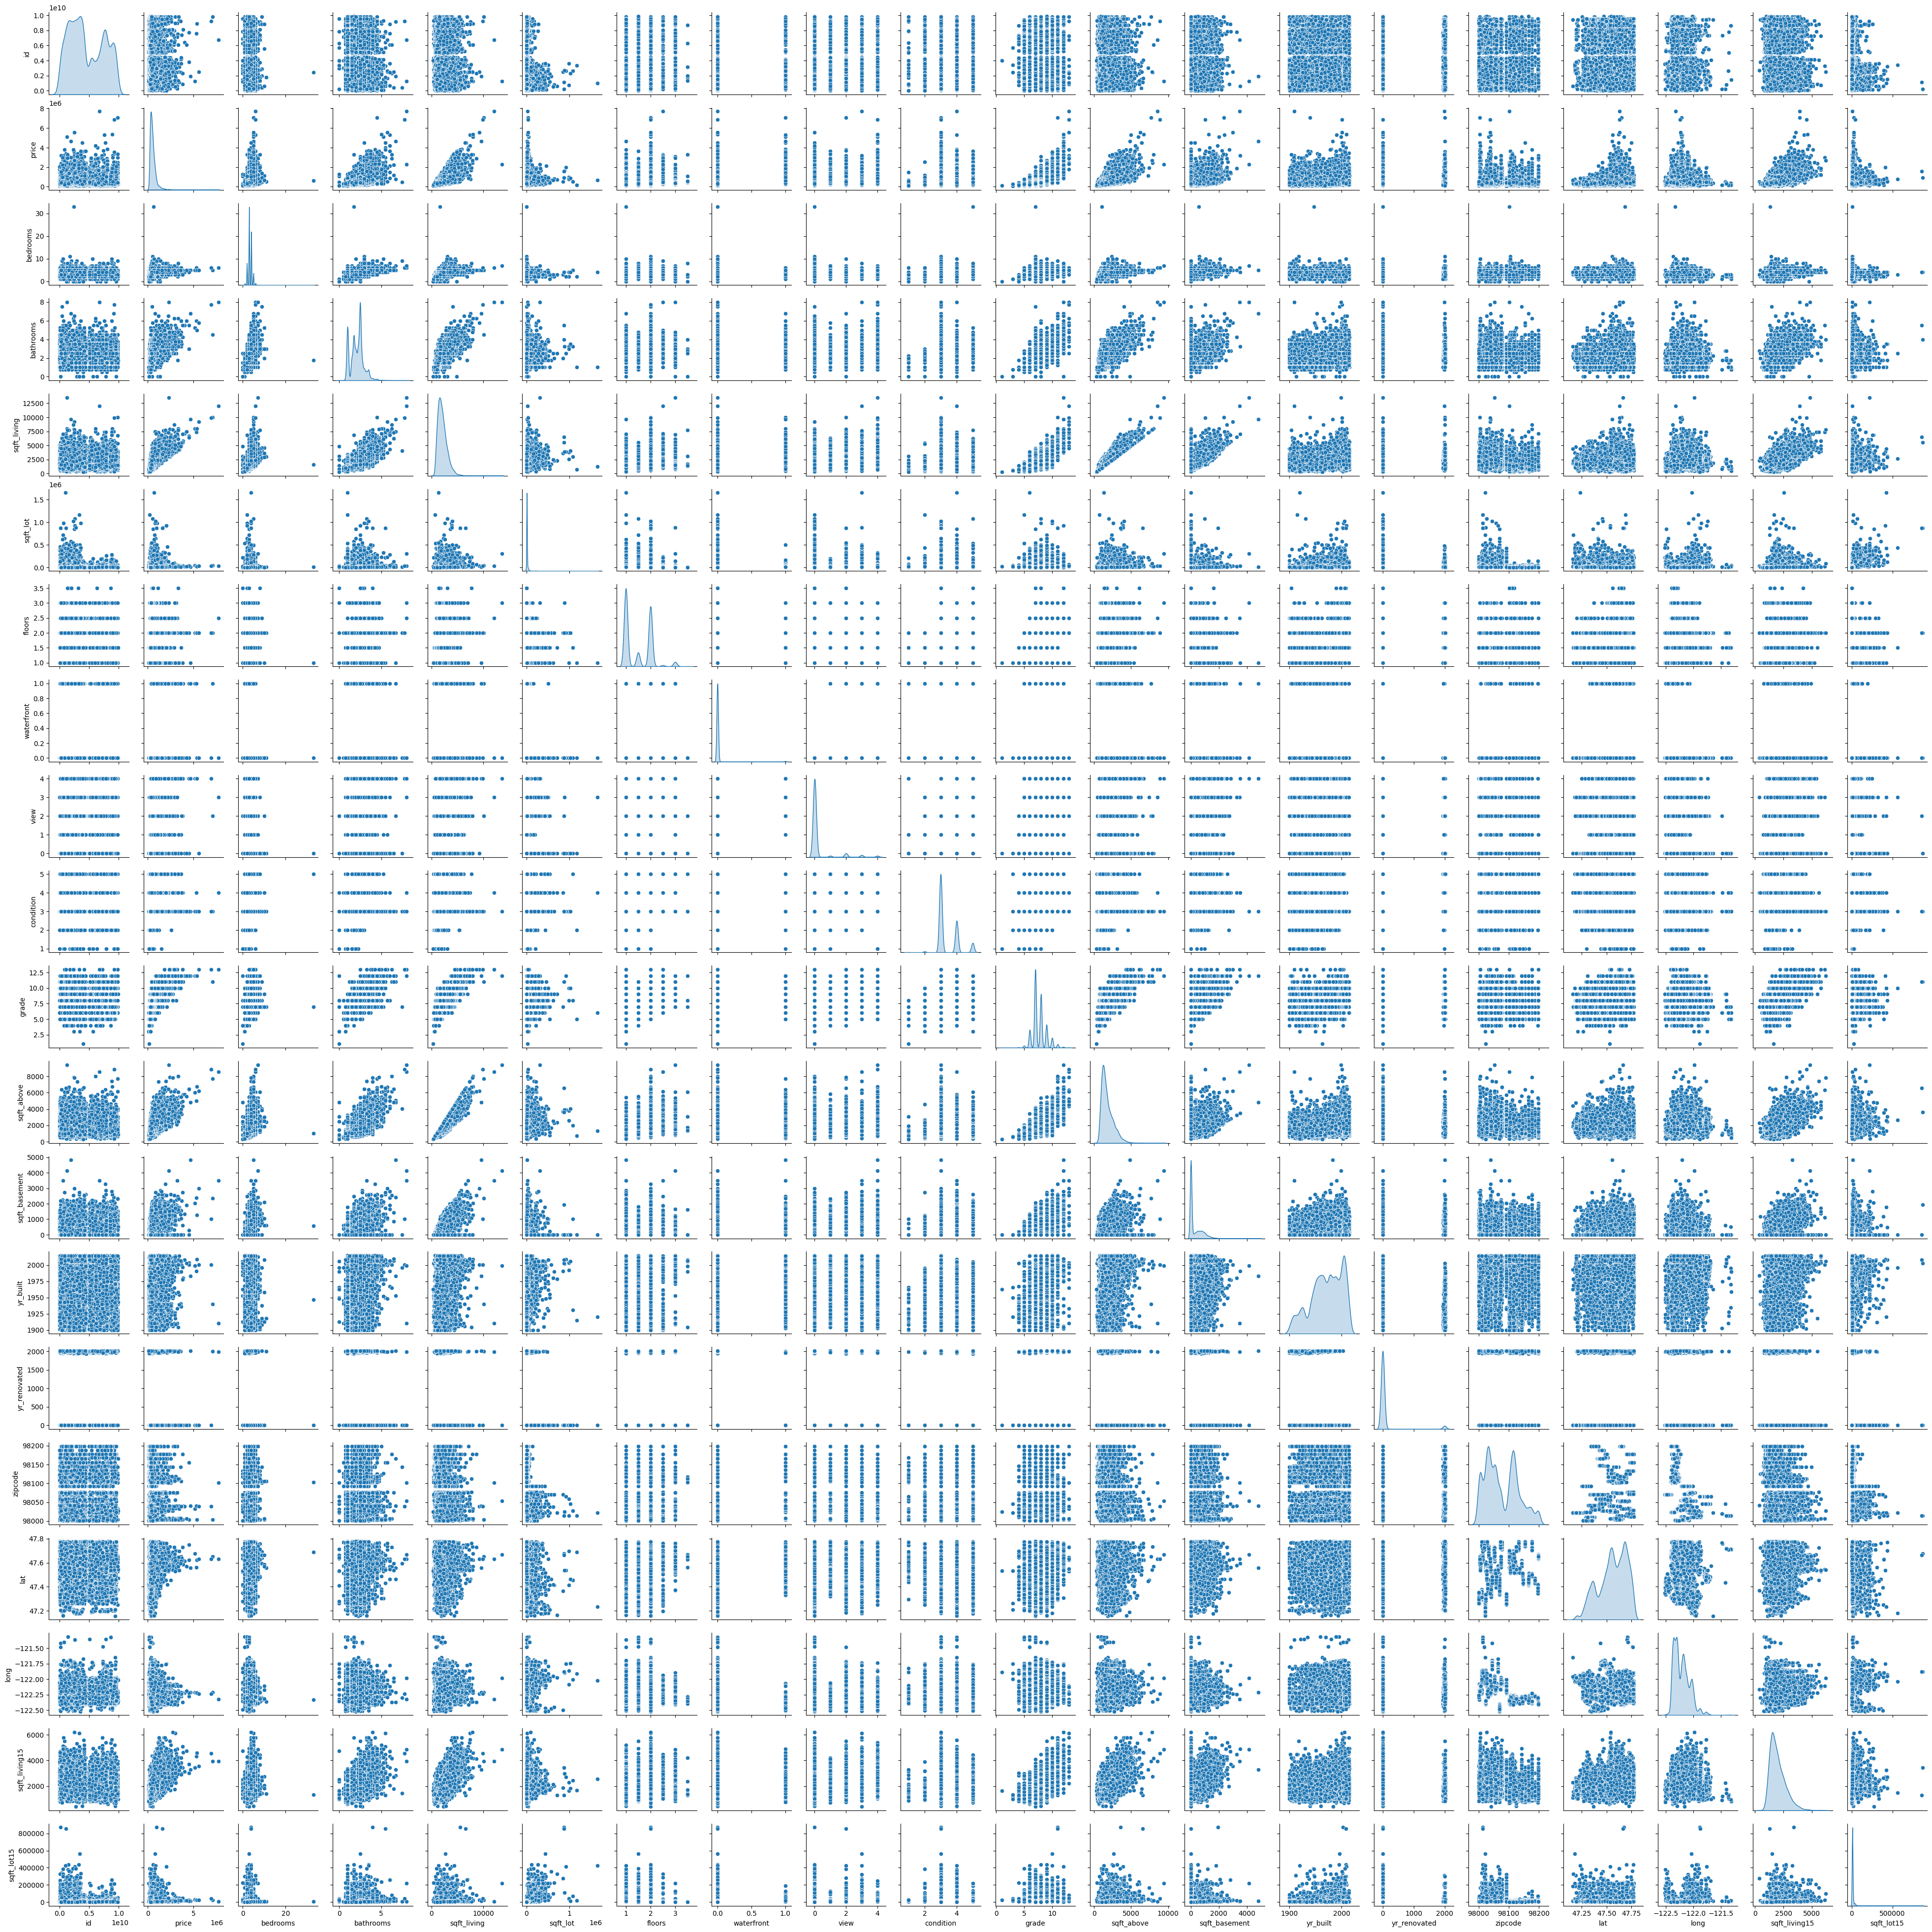

In [12]:
# kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
sns.pairplot(df, height=2, kind='scatter', diag_kind='kde')
plt.show()

Вывод:

В одном в формате storytelling провести анализ затруднительно, поэтому необходимо анализировать по частям

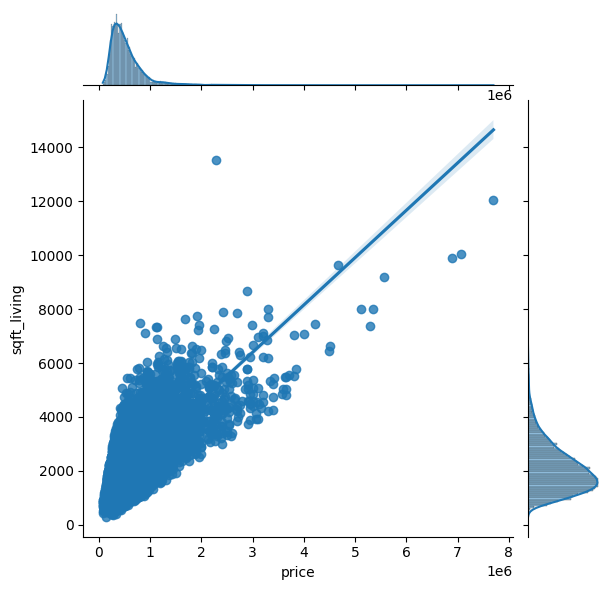

In [13]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

In [14]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

yr_built          price
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544522.000000
112      2012  527447.335294
113      2013  678545.452736
114      2014  683681.754919
115      2015  759785.157895

[116 rows x 2 columns]

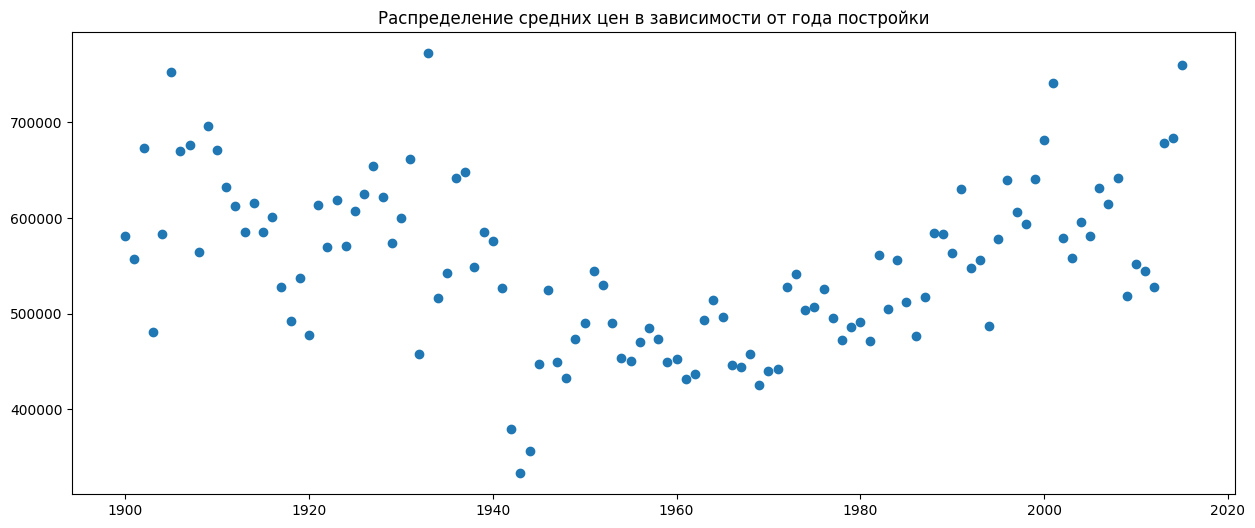

In [15]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Вывод:

- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в1940-х годах, принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти;
- для домов, построенных в2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- могу предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.

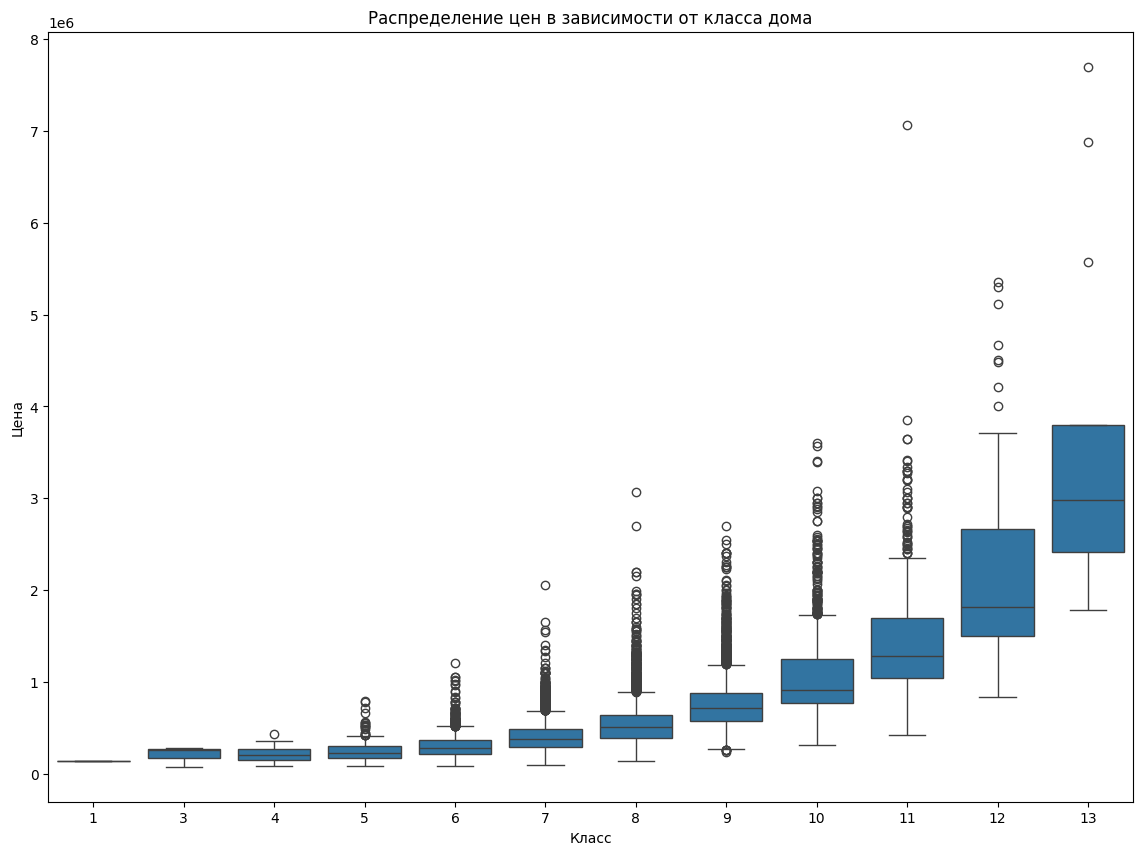

In [16]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

Вывод:

- с увеличением уровня класса (grade - качество конструкции и дизайна дома) растет разбег по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.

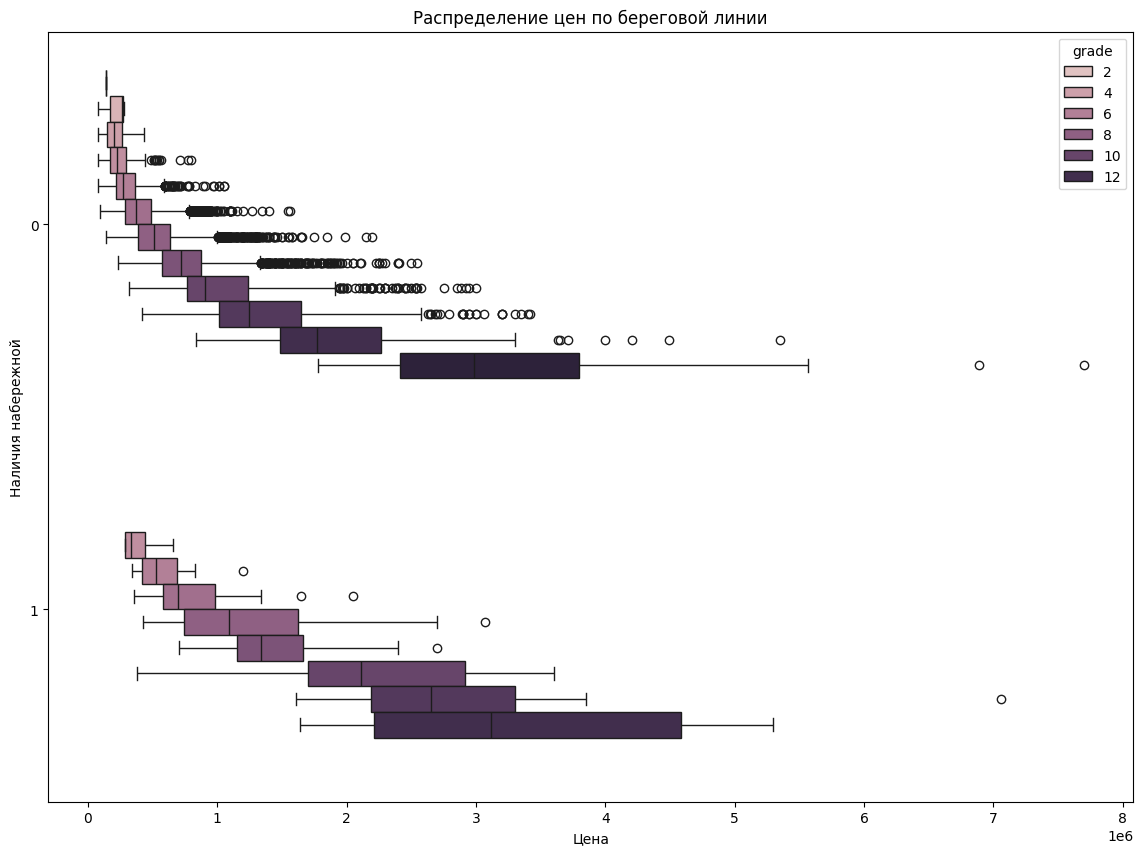

In [17]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5, hue=df['grade'])

plt.title('Распределение цен по береговой линии')
plt.xlabel('Цена')
plt.ylabel('Наличия набережной');

Вывод:

- уровень цен 50% домов, не имеющих набережную, значительно ниже, чем цена 50% домов, имеющих ее;
- для домов без набережной выбросов намного больше (видимо заинтересованность риелторов низкая по получаемой выручке и поэтому качество обработки данных теряеться);
- разбег цены для домов с набережной больше, чем для домов без нее.

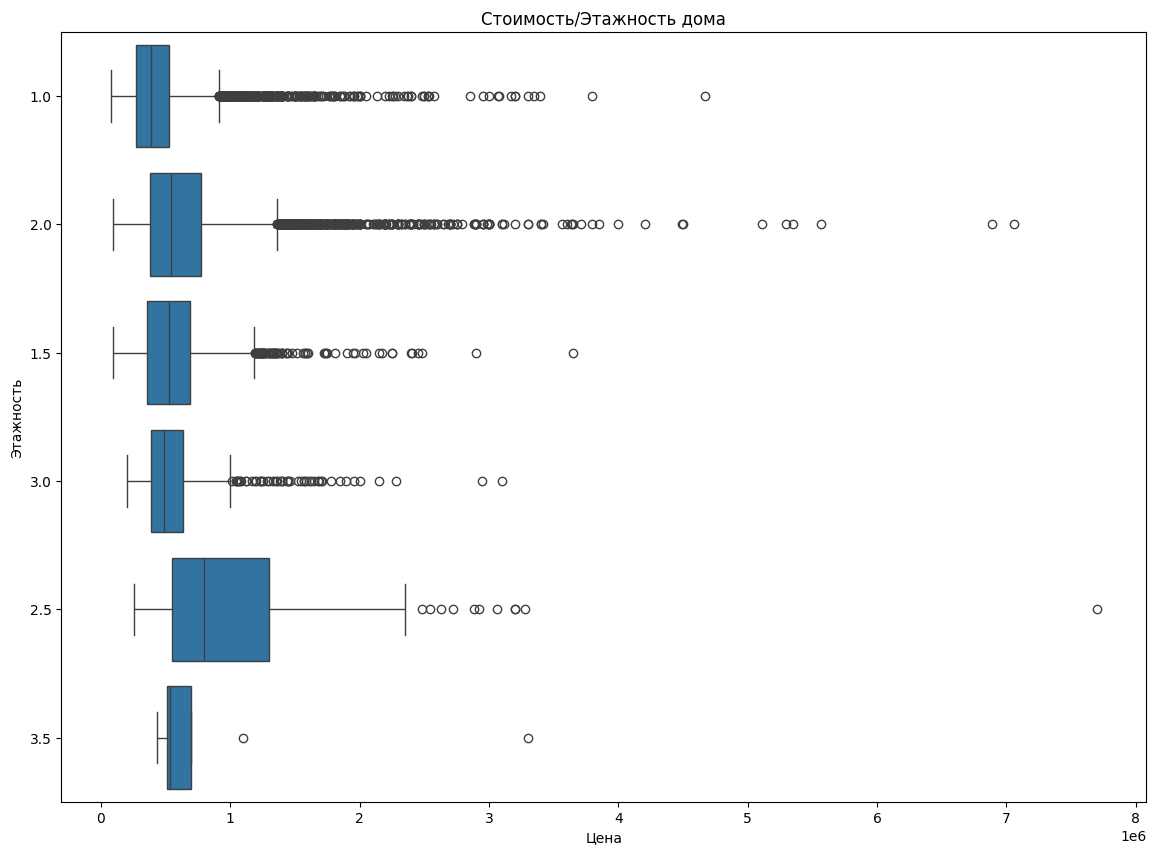

In [18]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['floors'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Этажность')
plt.title('Стоимость/Этажность дома');

Вывод:

- наибольший разбег по ценам наблюдается для домов в 2,5 этажей;
- минимальный разбег по ценам наблюдается для домов в 3,5 этажей;
- по 2-этажным домам наблюдается максимальное количество выбросов;
- дома с 3,5 этажами почти не имеют выбросов;
- самый дорогой дом имеет 2,5 этажа и продается почти за 8 000 000 д.е.

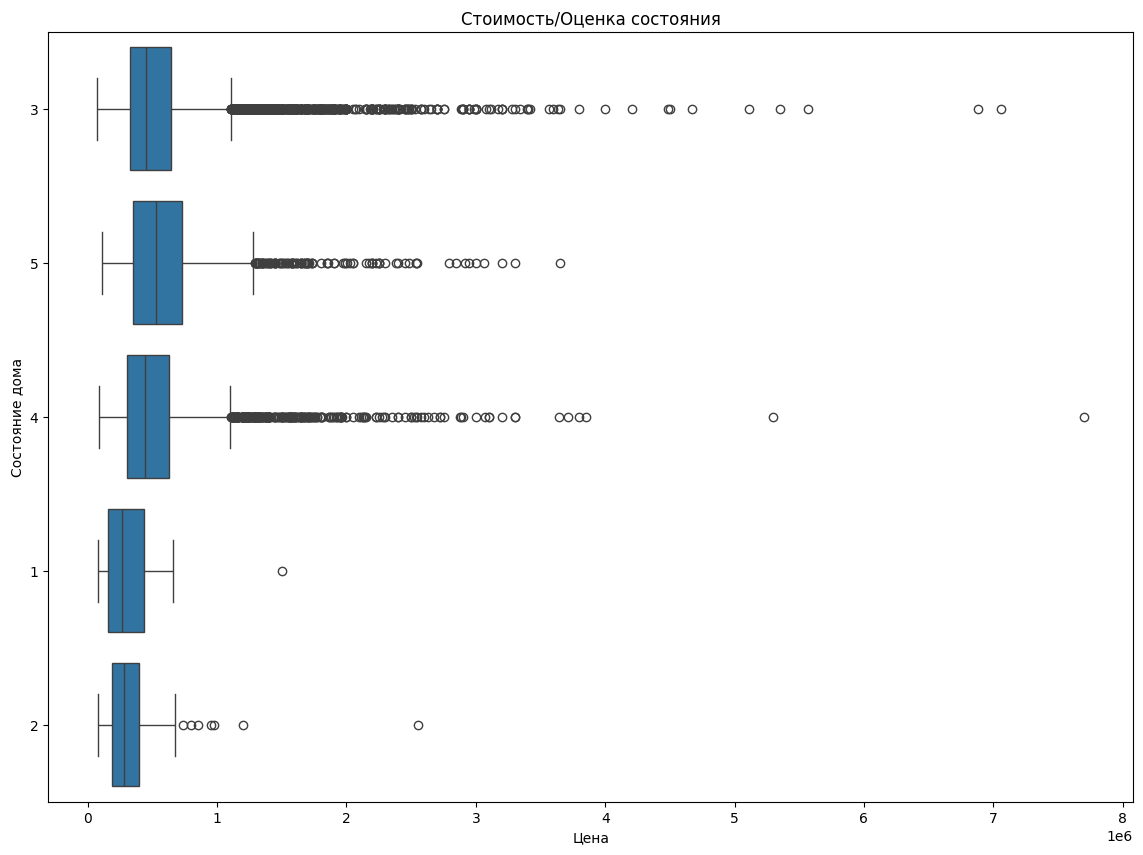

In [19]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['condition'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Состояние дома')
plt.title('Стоимость/Оценка состояния');

Вывод:

- дома, состояние которых оценивается в 1 и 2 почти не имеют выбросов;
- по домам с состоянием в 3-4 наблюдаются максимальное количество выбросов;
- для домов с состоянием в 3-5 более 75% наблюдений находится почти на одном и том же уровне цены;
- самый дорогой дом имеет 2,5 этажа с хорошим состоянием и продается почти за 8 000 000 д.е.

Общий вывод:

    На цену недвижимости влияют больше всего следующие параметры (в порядку убывания значимости):
        жилая площадь;
        качество конструкции и дизайна дома (класс);
        историческую ценность;
        размеры 15 соседних домов (Кв. метры жилой площади у 15 соседей).
    Хороше обслуживают клиентов по приобритению жилого фонда на набережной, т.к. риэлторы получают больше выручки от продаж.
    Реже продоют дома с 3,5 этажами.